In [ ]:
#Mount Drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [41]:
series = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [42]:
sequence_length = 3
 
gen = tf.keras.preprocessing.sequence.TimeseriesGenerator(
  series, series, sequence_length, batch_size=1)
 
for inputs, targets in gen:
  print("Feature:", inputs)
  print("Label:", targets)

Feature: [[1 2 3]]
Label: [4]
Feature: [[2 3 4]]
Label: [5]
Feature: [[3 4 5]]
Label: [6]
Feature: [[4 5 6]]
Label: [7]
Feature: [[5 6 7]]
Label: [8]


In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv", usecols=["Temp"])

In [45]:
num_samples = df.shape[0]
separator = int(num_samples * 0.8)
train = df[:separator]
test = df[separator:]

In [46]:
def get_dataset(df, seq_len, batch_size):
  val = df.values
   
  return tf.keras.preprocessing.sequence.TimeseriesGenerator(
    val, val, seq_len, batch_size=batch_size)

In [47]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(35, return_sequences=True),
    tf.keras.layers.LSTM(45, return_sequences=False),
    tf.keras.layers.Dense(1)
  ])
 
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam())
 
  return model

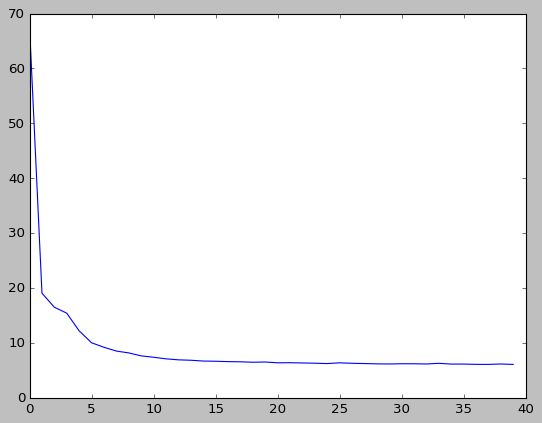

In [48]:
train_ds = get_dataset(train, 10, 50)
 
m = create_model()
history = m.fit(train_ds, epochs=40, verbose=False)
 
plt.style.use('classic')
plt.plot(history.history["loss"])

In [49]:
test_ds = get_dataset(test, 10, 1)
 
m.evaluate(test_ds)

720/720 [==============================] - 2s 2ms/step - loss: 5.0449


5.044910430908203

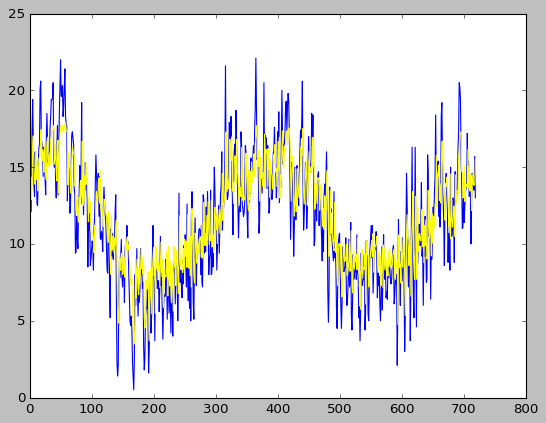

In [50]:
predictions = m.predict(test_ds)
 
test_labels = []
 
for batch in test_ds:
  test_labels.append(batch[1][0][0])
 
days = np.arange(0, predictions.shape[0])
plt.plot(days, test_labels)
plt.plot(days, predictions[:,0], color='yellow')